<a href="https://colab.research.google.com/github/kayal466/Task---Energy-prediction/blob/main/Energy_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as snf
from sklearn import metrics
import sklearn.metrics as sm
%matplotlib inline



Loading Dataset

In [ ]:
df = pd.read_excel('/content/ENB2012_data (1).xlsx')

In [ ]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [ ]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


Checking Null Values

In [ ]:
df.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

Renaming the Columns

In [ ]:
df = df.rename(columns={'X1':'Relative Compactness','X2':'Surface Area','X3':'Wall Area','X4':'Roof Area','X5':'Overall Height','X6':'Orientation','X7':'Glazing Area','X8':'Glazing Area Distribution','Y1':'Heating Load','Y2':'Cooling Load' })
df

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


Correlation

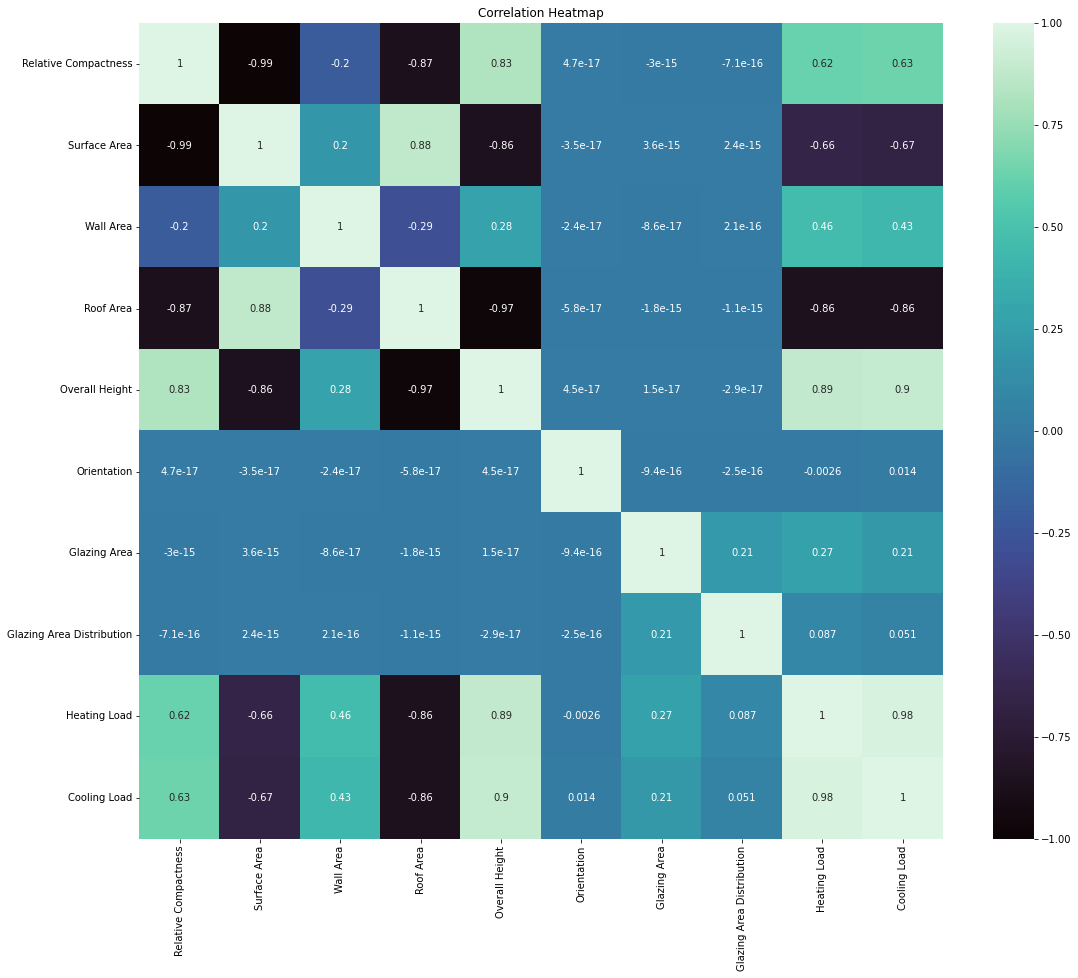

In [ ]:
corr = df.corr()

plt.figure(figsize=(18, 15))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.title("Correlation Heatmap")
plt.show()

Spliting the data

In [ ]:
y = df.iloc[:,8:]
x = df.iloc[:,:8]

In [ ]:
y

,Heating Load,Cooling Load
0,15.55,21.33
1,15.55,21.33
2,15.55,21.33
3,15.55,21.33
4,20.84,28.28
...,...,...
763,17.88,21.40
764,16.54,16.88
765,16.44,17.11
766,16.48,16.61


In [ ]:
x

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0
...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5


In [ ]:
y1 = y.iloc[:,:1]
y2 = y.iloc[:,1:]

In [ ]:
y1

,Heating Load
0,15.55
1,15.55
2,15.55
3,15.55
4,20.84
...,...
763,17.88
764,16.54
765,16.44
766,16.48


In [ ]:
y2

,Cooling Load
0,21.33
1,21.33
2,21.33
3,21.33
4,28.28
...,...
763,21.40
764,16.88
765,17.11
766,16.61


Selecting the model

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train1,y_test1,y_train2,y_test2 = train_test_split(x,y1,y2,test_size=0.2,random_state = 0)

In [ ]:
X_train

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
603,0.74,686.0,245.0,220.50,3.5,5,0.40,2
118,0.76,661.5,416.5,122.50,7.0,4,0.10,2
247,0.90,563.5,318.5,122.50,7.0,5,0.10,5
157,0.82,612.5,318.5,147.00,7.0,3,0.10,3
468,0.66,759.5,318.5,220.50,3.5,2,0.25,4
...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.40,5
192,0.98,514.5,294.0,110.25,7.0,2,0.10,4
629,0.90,563.5,318.5,122.50,7.0,3,0.40,3
559,0.71,710.5,269.5,220.50,3.5,5,0.40,1


Scaling the Data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
pd.DataFrame(X_test).head()

,0,1,2,3,4,5,6,7
0,-0.971851,0.978553,-0.002780,0.957784,-0.983844,-0.438156,1.231324,0.125603
1,-0.210976,0.142904,-1.709544,0.957784,-0.983844,0.464621,-1.026614,-0.522464
2,0.264572,-0.414195,0.566142,-0.675770,1.016421,-0.438156,-1.026614,-0.522464
3,0.549900,-0.692745,-0.002780,-0.675770,1.016421,0.464621,-1.779260,-1.818599
4,2.071651,-1.806944,-0.571701,-1.492547,1.016421,-0.438156,1.231324,-1.170532


LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.metrics import mean_squared_error
regrssor = LinearRegression()
reg1 = regrssor.fit(X_train,y_train1)
reg2 = regrssor.fit(X_train,y_train2)
pred1 = reg1.predict(X_test)
pred2 = reg2.predict(X_test)

In [ ]:
print("Mean absolute error for pred1 =",round(sm.mean_absolute_error(y_test1,pred1),2))
print("Mean squared error for pred1 =",round(sm.mean_squared_error(y_test1,pred1),2))
print("Median absolute error for pred1 =",round(sm.median_absolute_error(y_test1,pred1),2))
print("Explain variance score  for pred1 =",round(sm.explained_variance_score(y_test1,pred1),2))
print("R2 score for pred1 =",round(sm.r2_score(y_test1,pred1),2))

Mean absolute error for pred1 = 3.34
Mean squared error for pred1 = 16.26
Median absolute error for pred1 = 3.0
Explain variance score  for pred1 = 0.9
R2 score for pred1 = 0.85


In [ ]:
print("Mean absolute error for pred2 =",round(sm.mean_absolute_error(y_test2,pred2),2))
print("Mean squared error for pred2 =",round(sm.mean_squared_error(y_test2,pred2),2))
print("Median absolute error for pred2 =",round(sm.median_absolute_error(y_test2,pred2),2))
print("Explain variance score  for pred2 =",round(sm.explained_variance_score(y_test2,pred2),2))
print("R2 score for pred2 =",round(sm.r2_score(y_test2,pred2),2))

Mean absolute error for pred2 = 2.25
Mean squared error for pred2 = 10.7
Median absolute error for pred2 = 1.4
Explain variance score  for pred2 = 0.89
R2 score for pred2 = 0.89


Visualizing the Data

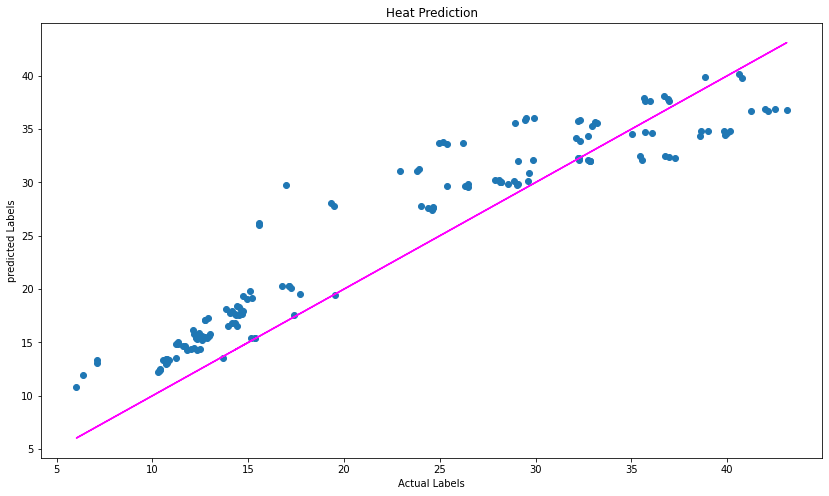

In [ ]:
FIG_SIZE = (14,8)
plt.figure(figsize = FIG_SIZE)
plt.scatter(y_test1,pred1)
plt.xlabel('Actual Labels')
plt.ylabel('predicted Labels')
plt.title('Heat Prediction')
plt.plot(y_test1,y_test1, color = 'magenta')
plt.show()


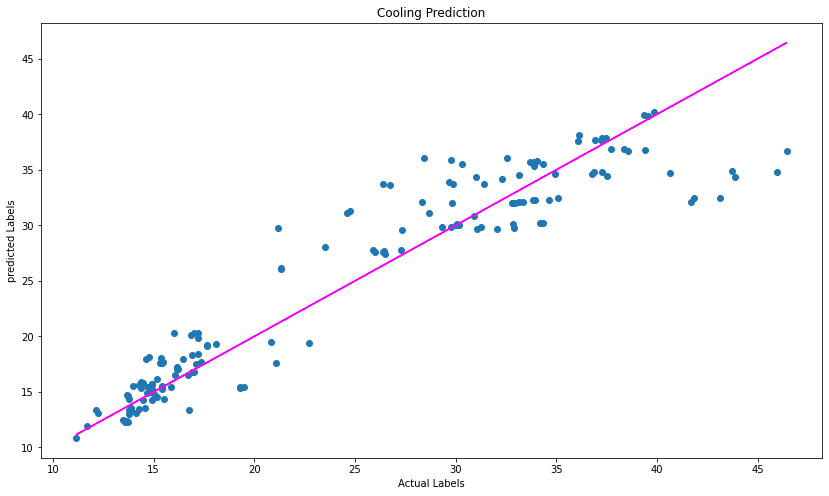

In [ ]:
FIG_SIZE = (14,8)
plt.figure(figsize = FIG_SIZE)
plt.scatter(y_test2,pred2)
plt.xlabel('Actual Labels')
plt.ylabel('predicted Labels')
plt.title('Cooling Prediction')
plt.plot(y_test2,y_test2, color = 'magenta')
plt.show()


RandomForestRegressor

In [ ]:
from sklearn .ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=1000,random_state = 42)
rf_reg1 = rf.fit(X_train,y_train1)
rf_reg2 = rf.fit(X_train,y_train2)
rf_pred1 = rf_reg1.predict(X_test)
rf_pred2 = rf_reg2.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [ ]:
print("Mean absolute error for rf_pred1 =",round(sm.mean_absolute_error(y_test1,rf_pred1),2))
print("Mean squared error for rf_pred1 =",round(sm.mean_squared_error(y_test1,rf_pred1),2))
print("Median absolute error for rf_pred1 =",round(sm.median_absolute_error(y_test1,rf_pred1),2))
print("Explain variance score  for rf_pred1 =",round(sm.explained_variance_score(y_test1,rf_pred1),2))
print("R2 score for rf_pred1 =",round(sm.r2_score(y_test1,rf_pred1),2))

Mean absolute error for rf_pred1 = 2.27
Mean squared error for rf_pred1 = 7.44
Median absolute error for rf_pred1 = 2.14
Explain variance score  for rf_pred1 = 0.97
R2 score for rf_pred1 = 0.93


In [ ]:
print("Mean absolute error for rf_pred2 =",round(sm.mean_absolute_error(y_test2,rf_pred2),2))
print("Mean squared error for rf_pred2 =",round(sm.mean_squared_error(y_test2,rf_pred2),2))
print("Median absolute error for rf_pred2 =",round(sm.median_absolute_error(y_test2,rf_pred2),2))
print("Explain variance score  for rf_pred2 =",round(sm.explained_variance_score(y_test2,rf_pred2),2))
print("R2 score for rf_pred2 =",round(sm.r2_score(y_test2,rf_pred2),2))

Mean absolute error for rf_pred2 = 1.08
Mean squared error for rf_pred2 = 3.35
Median absolute error for rf_pred2 = 0.34
Explain variance score  for rf_pred2 = 0.96
R2 score for rf_pred2 = 0.96


Visualizing the Data

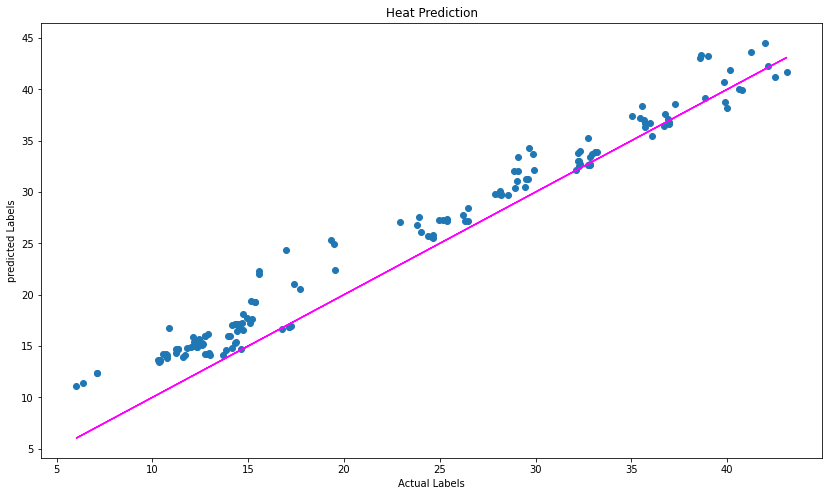

In [ ]:
FIG_SIZE = (14,8)
plt.figure(figsize = FIG_SIZE)
plt.scatter(y_test1,rf_pred1)
plt.xlabel('Actual Labels')
plt.ylabel('predicted Labels')
plt.title('Heat Prediction')
plt.plot(y_test1,y_test1, color = 'magenta')
plt.show()


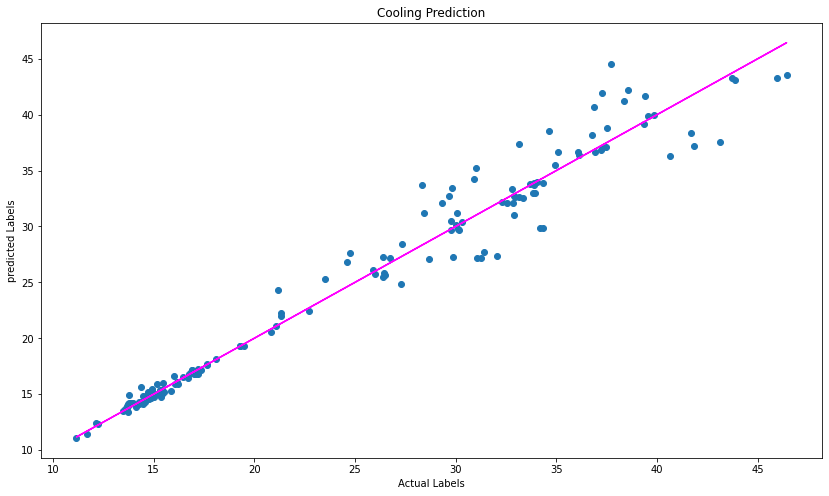

In [ ]:
FIG_SIZE = (14,8)
plt.figure(figsize = FIG_SIZE)
plt.scatter(y_test2,rf_pred2)
plt.xlabel('Actual Labels')
plt.ylabel('predicted Labels')
plt.title('Cooling Prediction')
plt.plot(y_test2,y_test2, color = 'magenta')
plt.show()


**Best** **Model** **is** **RandomForestRegressor** : **The** **best** **r2** **score** **is** **.96**

IMPORTED ESSENTIAL LIBRARIES
LOADED THE DATASET
CHECKED ITS NULL VALUES AND DATA TYPES AND COUNT
THERE IS NO NULL VALUES SO NEEDNOT TO FILL THE NULL VALUES 
SPLITTED THE DATA TO TEST AND TRAIN TO PREDICT THE HEAT AND COOLING
IMPORTED THS SCALING AND INITIALISED THE FIRST MODEL LINEAR REGRESSION
THE FOUND THE MSE ,MAE AND R2 
THE LINEAR  R2 FOR HEAT IS .85
THE LINEAR  R2 FOR HEAT IS .89
AND VISUALIZED THE DATA IN SCATTER PLOT
SECOND MODEL IS RANDOMFORESTREGRESSOR 
TRAINE THE DATA FOR MSE,MAE AND R2
THE RANDOM FOREST R2 SCORE FOR HEAT IS 0.93
THE RANDOM FOREST R2 SCORE FOR COOLING IS 0.96
THE BEST MODEL IS RANDOM FOREST REGRESSOR
